In [2]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A':1, 'B':2}, {'B':3, 'C':1}]
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [3]:
v.feature_names_

['A', 'B', 'C']

In [4]:
v.transform({'C':4, 'D':3})

array([[0., 0., 4.]])

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the thried one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 8,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'thried': 9,
 'one': 5,
 'last': 4}

In [6]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 1, 0]], dtype=int64)

In [7]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [8]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 2, 1, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]], dtype=int64)

In [11]:
vect = CountVectorizer(stop_words=['and', 'is','this','this']).fit(corpus)
vect.vocabulary_

{'the': 5,
 'first': 1,
 'document': 0,
 'second': 4,
 'thried': 6,
 'one': 3,
 'last': 2}

In [13]:
vect = CountVectorizer(stop_words='english').fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1, 'thried': 2}

In [14]:
vect = CountVectorizer(analyzer = 'char').fit(corpus)
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [15]:
import nltk

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


{'this': 10,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'thried': 11,
 'one': 7,
 '?': 1,
 'last': 6}

In [17]:
# n그램: 단어장 생성에 사용할 토큰의 크기 결정
vect = CountVectorizer(ngram_range=(2,2)).fit(corpus)
vect.vocabulary_

{'this is': 11,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the thried': 10,
 'thried one': 13,
 'is this': 3,
 'this the': 12,
 'the last': 8,
 'last document': 4}

In [18]:
vect = CountVectorizer(ngram_range=(1,2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 2, 'the': 0, 'this the': 3, 'thried': 4, 'the thried': 1}

In [19]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'thried'})

In [20]:
vect.transform(corpus).toarray().sum(axis=0)

array([4, 2, 3, 3], dtype=int64)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.4629834 , 0.        ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.28709733, 0.        ],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.        , 0.55666851],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.4629834 , 0.        ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

In [23]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [24]:
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

Wall time: 3.86 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=300000)

In [26]:
%time hv.transform(twenty.data)

Wall time: 1.72 s


<11314x300000 sparse matrix of type '<class 'numpy.float64'>'
	with 1786336 stored elements in Compressed Sparse Row format>

In [27]:
# 문자열 분석기를 사용하여 웹사이트에 특정한 단어가 어느 정도 사용되었는지 빈도수를 알아보기

import warnings
warnings.simplefilter("ignore")

import json
import string
from urllib.request import urlopen
from konlpy.utils import pprint
from konlpy.tag import Hannanum

hannanum = Hannanum()

f = urlopen("https://www.datascienceschool.net/download-notebook/708e711429a646818b9dcbb581e0c10a/")
json = json.loads(f.read())

cell = ["\n".join(c['source']) for c in json["cells"] if c ["cell_type"] == "markdown"]
docs = [ w for w in hannanum.nouns(" ".join(cell))
       if (( not w[0].isnumeric()) and (w[0] not in string.punctuation))]

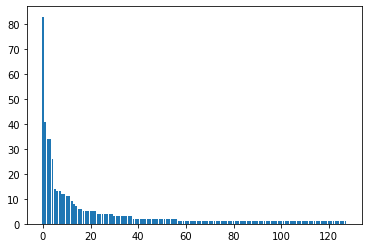

In [30]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.show()

In [31]:
pprint(list(zip(feature_name, count))[:10])

[('컨테이너', 83),
 ('도커', 41),
 ('명령', 34),
 ('이미지', 34),
 ('사용', 26),
 ('가동', 14),
 ('중지', 13),
 ('mingw64', 13),
 ('다음', 12),
 ('삭제', 12)]
